In [131]:
import csv
import pickle
import statistics as stat

In [132]:
m_names = {
    'acc':'avg-acc',
    'best-acc':'best-acc',
    'discrete acc darts':'disc-acc',
    'best_nwot':'best_zc(nwot)',
    'best_synflow':'best_zc(synflow)',
    'dartspt':'darts-pt',
    'zc pt':'zc-pt(nwot)',
    'discrete zc':'disc-zc(nwot)',
    #'alpha':'darts-100',
    'alpha-60':'darts',
    'tenaspt':'tenas',
    'synflow':'zc-pt(synflow)',
    'synflow_disc':'disc-zc(synflow)',
    'zc-pt-post':'zc-pt-post',
    'zc-disc-post':'zc-disc-post'
}

In [133]:
ops=[]
edge = 0
num_edges = 6
op_strengths = []
for e in range(num_edges):
    op_strengths.append({})

with open('op_strength_src.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            ops = row[1:-1]
            line_count += 1
        else:
            #print(row)
            if row == ['', '', '', '', '', '', '']:
                edge += 1
                line_count += 1
                continue
            #parse row
            if row[0] not in m_names:
                continue
            method = m_names[row[0]]
            op_strengths[edge][method] = []
            for r in row[1:-1]:
                if '±' in r:
                    r1 = r.split('±')[0]
                    r2 = r.split('±')[1]
                    r=r1
                metric = float(r)
                op_strengths[edge][method].append(metric)
            line_count += 1
print(ops)

['none', 'skip_connect', 'nor_conv_1x1', 'nor_conv_3x3', 'avg_pool_3x3']


In [134]:
op_strengths

[{'avg-acc': [77.36, 83.81, 86.38, 87.32, 81.02],
  'disc-acc': [83.42, 84.1, 72.0, 76.35, 39.66],
  'darts-pt': [85.43, 17.02, 78.13, 59.09, 85.34],
  'zc-pt(nwot)': [3455.233646,
   3449.898772,
   3449.538363,
   3441.815563,
   3461.179476],
  'disc-zc(nwot)': [3331.007285,
   3445.489455,
   3366.877065,
   3437.551079,
   3423.180255],
  'best-acc': [94.15, 94.18, 94.44, 94.68, 93.86],
  'darts': [0.1387, 0.4758, 0.1296, 0.181, 0.0748],
  'tenas': [38.5, 48.0, 31.0, 6.0, 37.5],
  'zc-pt(synflow)': [1.9286723850908796e+31,
   7.990282869734622e+30,
   1.2421187150331997e+30,
   9.438907569335487e+26,
   8.191504786187086e+30],
  'disc-zc(synflow)': [4.639162000716631e+21,
   1.4975281050055959e+26,
   4.2221622054263117e+30,
   1.9475517523688712e+36,
   1.5075022033622535e+26],
  'best_zc(nwot)': [1702.1967536035393,
   1773.1779654806287,
   1793.8140278364453,
   1792.8682630835763,
   1761.1262357119376],
  'best_zc(synflow)': [5.784248799475683e+39,
   1.4769546208886953e+44,

In [135]:
#override disc_acc with results from lukasz
disc_accuracy_stage_0 = {(100, 0, 0): 83.267998,
 (100, 0, 1): 82.239998,
 (100, 0, 2): 64.995995,
 (100, 0, 3): 71.755997,
 (100, 0, 4): 54.307999,
 (100, 1, 0): 84.935997,
 (100, 1, 1): 83.231995,
 (100, 1, 2): 73.231995,
 (100, 1, 3): 76.771996,
 (100, 1, 4): 83.451996,
 (100, 2, 0): 83.867996,
 (100, 2, 1): 83.727997,
 (100, 2, 2): 77.332001,
 (100, 2, 3): 76.832001,
 (100, 2, 4): 83.251999,
 (100, 3, 0): 65.767998,
 (100, 3, 1): 84.444,
 (100, 3, 2): 75.816002,
 (100, 3, 3): 78.68,
 (100, 3, 4): 62.703999,
 (100, 4, 0): 83.571999,
 (100, 4, 1): 82.028,
 (100, 4, 2): 75.023994,
 (100, 4, 3): 76.087997,
 (100, 4, 4): 82.563995,
 (100, 5, 0): 83.947998,
 (100, 5, 1): 82.447998,
 (100, 5, 2): 66.692001,
 (100, 5, 3): 71.363998,
 (100, 5, 4): 80.311996}

for e in range(6):
    for o in range(5):
        op_strengths[e]['disc-acc'][o] = disc_accuracy_stage_0[(100,e,o)]

In [136]:
flat_op_strengths = {}
for k in op_strengths[0].keys():
    flat_op_strengths[k] = []
for e in op_strengths:
    for k,v in e.items():
        if 'pt' in k or 'tenas' in k:
            flat_op_strengths[k].extend([-vv for vv in v])
        else:
            flat_op_strengths[k].extend(v)

In [137]:
sq_op_strengths = {}
for k in op_strengths[0].keys():
    sq_op_strengths[k] = []
for e in op_strengths:
    for k,v in e.items():
        if 'pt' in k or 'tenas' in k:
            sq_op_strengths[k].append([-vv for vv in v])
        else:
            sq_op_strengths[k].append(v)

In [138]:
import pandas as pd
all_corr = []
for e in range(6):
    d = {}
    for k,v in sq_op_strengths.items():
        d[k] = v[e]
    print(d)
    df = pd.DataFrame(d)
    all_corr.append(df.corr(method='spearman'))
df      = pd.concat(all_corr)
df_mean = df.groupby(level=0).mean()
df_mean

{'avg-acc': [77.36, 83.81, 86.38, 87.32, 81.02], 'disc-acc': [83.267998, 82.239998, 64.995995, 71.755997, 54.307999], 'darts-pt': [-85.43, -17.02, -78.13, -59.09, -85.34], 'zc-pt(nwot)': [-3455.233646, -3449.898772, -3449.538363, -3441.815563, -3461.179476], 'disc-zc(nwot)': [3331.007285, 3445.489455, 3366.877065, 3437.551079, 3423.180255], 'best-acc': [94.15, 94.18, 94.44, 94.68, 93.86], 'darts': [0.1387, 0.4758, 0.1296, 0.181, 0.0748], 'tenas': [-38.5, -48.0, -31.0, -6.0, -37.5], 'zc-pt(synflow)': [-1.9286723850908796e+31, -7.990282869734622e+30, -1.2421187150331997e+30, -9.438907569335487e+26, -8.191504786187086e+30], 'disc-zc(synflow)': [4.639162000716631e+21, 1.4975281050055959e+26, 4.2221622054263117e+30, 1.9475517523688712e+36, 1.5075022033622535e+26], 'best_zc(nwot)': [1702.1967536035393, 1773.1779654806287, 1793.8140278364453, 1792.8682630835763, 1761.1262357119376], 'best_zc(synflow)': [5.784248799475683e+39, 1.4769546208886953e+44, 6.658953754065702e+49, 5.1987025703231504e+

avg-acc  disc-acc  darts-pt  zc-pt(nwot)  disc-zc(nwot)  \
avg-acc           1.000000 -0.483333  0.666667     0.833333       0.033333   
best-acc          0.650000 -0.316667  0.416667     0.766667       0.100000   
best_zc(nwot)     0.816667 -0.466667  0.550000     0.783333       0.066667   
best_zc(synflow)  0.416667 -0.350000  0.400000     0.533333       0.166667   
darts             0.316667  0.350000  0.650000     0.450000       0.500000   
darts-pt          0.666667 -0.216667  1.000000     0.583333       0.400000   
disc-acc         -0.483333  1.000000 -0.216667    -0.316667       0.116667   
disc-zc(nwot)     0.033333  0.116667  0.400000     0.216667       1.000000   
disc-zc(synflow)  0.916667 -0.600000  0.633333     0.716667      -0.083333   
tenas             0.300433 -0.157684  0.175216     0.243615       0.077814   
zc-disc-post     -0.033333  0.200000  0.400000    -0.066667       0.633333   
zc-pt(nwot)       0.833333 -0.316667  0.583333     1.000000       0.216667   
zc-pt(synflow)    0.933333 -0.550000  0.683333     0.750000      -0.050000   
zc-pt-post        0.683333 -0.400000  0.633333     0.800000       0.266667   

                  best-acc     darts     tenas  zc-pt(synflow)  \
avg-acc           0.650000  0.316667  0.300433        0.933333   
best-acc          1.000000  0.200000  0.435065        0.633333   
best_zc(nwot)     0.533333  0.216667  0.099134        0.750000   
best_zc(synflow)  0.250000  0.366667  0.225216        0.383333   
darts             0.200000  1.000000  0.135065        0.216667   
darts-pt          0.416667  0.650000  0.175216        0.683333   
disc-acc         -0.316667  0.350000 -0.157684       -0.550000   
disc-zc(nwot)     0.100000  0.500000  0.077814       -0.050000   
disc-zc(synflow)  0.600000  0.150000  0.317100        0.983333   
tenas             0.435065  0.135065  1.000000        0.283766   
zc-disc-post     -0.250000  0.400000 -0.108550       -0.133333   
zc-pt(nwot)       0.766667  0.450000  0.243615        0.750000   
zc-pt(synflow)    0.633333  0.216667  0.283766        1.000000   
zc-pt-post        0.583333  0.400000  0.083766        0.583333   

                  disc-zc(synflow)  best_zc(nwot)  best_zc(synflow)  \
avg-acc                   0.916667       0.816667          0.416667   
best-acc                  0.600000       0.533333          0.250000   
best_zc(nwot)             0.733333       1.000000          0.466667   
best_zc(synflow)          0.333333       0.466667          1.000000   
darts                     0.150000       0.216667          0.366667   
darts-pt                  0.633333       0.550000          0.400000   
disc-acc                 -0.600000      -0.466667         -0.350000   
disc-zc(nwot)            -0.083333       0.066667          0.166667   
disc-zc(synflow)          1.000000       0.733333          0.333333   
tenas                     0.317100       0.099134          0.225216   
zc-disc-post             -0.150000      -0.100000          0.100000   
zc-pt(nwot)               0.716667       0.783333          0.533333   
zc-pt(synflow)            0.983333       0.750000          0.383333   
zc-pt-post                0.516667       0.583333          0.650000   

                  zc-pt-post  zc-disc-post  
avg-acc             0.683333     -0.033333  
best-acc            0.583333     -0.250000  
best_zc(nwot)       0.583333     -0.100000  
best_zc(synflow)    0.650000      0.100000  
darts               0.400000      0.400000  
darts-pt            0.633333      0.400000  
disc-acc           -0.400000      0.200000  
disc-zc(nwot)       0.266667      0.633333  
disc-zc(synflow)    0.516667     -0.150000  
tenas               0.083766     -0.108550  
zc-disc-post        0.216667      1.000000  
zc-pt(nwot)         0.800000     -0.066667  
zc-pt(synflow)      0.583333     -0.133333  
zc-pt-post          1.000000      0.216667

                  best-acc   avg-acc  disc-acc  best_zc(nwot)  \
best-acc          1.000000  0.650000 -0.316667       0.533333   
avg-acc           0.650000  1.000000 -0.483333       0.816667   
disc-acc         -0.316667 -0.483333  1.000000      -0.466667   
best_zc(nwot)     0.533333  0.816667 -0.466667       1.000000   
best_zc(synflow)  0.250000  0.416667 -0.350000       0.466667   
disc-zc(synflow)  0.600000  0.916667 -0.600000       0.733333   
zc-pt(synflow)    0.633333  0.933333 -0.550000       0.750000   
disc-zc(nwot)     0.100000  0.033333  0.116667       0.066667   
zc-pt(nwot)       0.766667  0.833333 -0.316667       0.783333   

                  best_zc(synflow)  disc-zc(synflow)  zc-pt(synflow)  \
best-acc                  0.250000          0.600000        0.633333   
avg-acc                   0.416667          0.916667        0.933333   
disc-acc                 -0.350000         -0.600000       -0.550000   
best_zc(nwot)             0.466667          0.733333        0

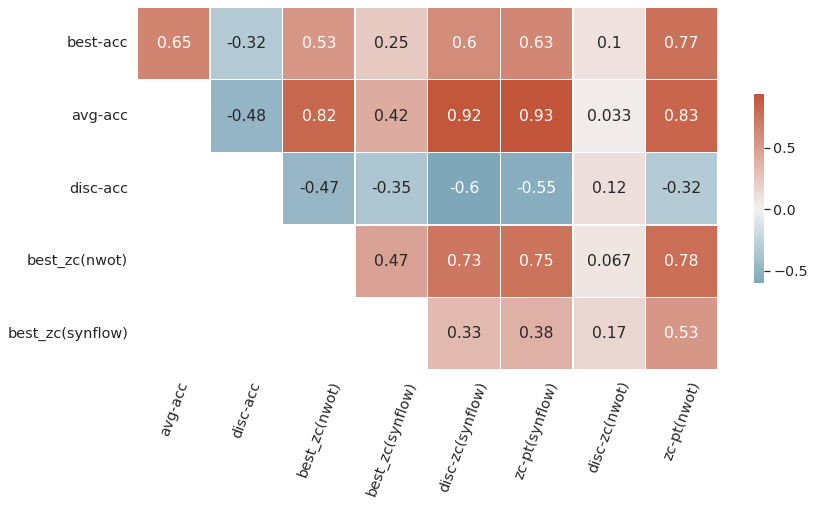

In [149]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import pathlib

sns.set_theme(style="white")
#plt.figure(figsize=(16,10))
#if 'zc' in flat_op_strengths:
#    flat_op_strengths.pop('zc')
df = df_mean
# df=df.reindex(["best-acc", "avg-acc", "disc-acc", "darts", "darts-pt", 'tenas','disc-zc(synflow)','zc-pt(synflow)', "disc-zc(nwot)", "zc-pt(nwot)"])
# df = df[["best-acc", "avg-acc", "disc-acc", "darts", "darts-pt",'tenas' ,'disc-zc(synflow)','zc-pt(synflow)', "disc-zc(nwot)", "zc-pt(nwot)"]]
#print(df)
# df=df.reindex(["best-acc", "avg-acc", "disc-acc", 'best_zc(nwot)', "disc-zc(nwot)", "zc-pt(nwot)"])
# df = df[["best-acc", "avg-acc", "disc-acc",'best_zc(nwot)' , "disc-zc(nwot)", "zc-pt(nwot)"]]
# df=df.reindex(["best-acc", "avg-acc", "disc-acc", 'best_zc(synflow)','disc-zc(synflow)','zc-pt(synflow)'])
# df = df[["best-acc", "avg-acc", "disc-acc", 'best_zc(synflow)','disc-zc(synflow)','zc-pt(synflow)']]
df=df.reindex(["best-acc", "avg-acc", "disc-acc", 'best_zc(nwot)', 'best_zc(synflow)', 'disc-zc(synflow)','zc-pt(synflow)',"disc-zc(nwot)", "zc-pt(nwot)"])
df = df[["best-acc", "avg-acc", "disc-acc",'best_zc(nwot)' , 'best_zc(synflow)', 'disc-zc(synflow)','zc-pt(synflow)',"disc-zc(nwot)", "zc-pt(nwot)"]]


# Compute the correlation matrix
#corr = df.corr(method='spearman')
corr=df
print(corr)

# Generate a mask for the upper triangle
mask = np.tril(np.ones_like(corr, dtype=bool))

for i in range(5,9):
    for j in range(0,9):
        mask[i][j]=True

masked_corr = corr.loc[~np.all(mask, axis=1), ~np.all(mask, axis=0)]
masked_mask = mask[0:5,1:9]
print(np.shape(masked_corr))
print(np.shape(masked_mask))


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 13))
sns.set(font_scale=1.3)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(masked_corr, mask=masked_mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .267}, annot=True)

g.set_yticklabels(labels=g.get_yticklabels(), va='center', fontsize = 14.5)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 14.5, rotation=70)

f.savefig(pathlib.Path('metric_correlation').with_suffix('.pdf'), bbox_inches='tight')

          best-acc   avg-acc  disc-acc  darts-pt   disc-zc     zc-pt     darts
best-acc  1.000000  0.650000 -0.316667  0.416667  0.100000  0.766667  0.200000
avg-acc   0.650000  1.000000 -0.483333  0.666667  0.033333  0.833333  0.316667
disc-acc -0.316667 -0.483333  1.000000 -0.216667  0.116667 -0.316667  0.350000
darts-pt  0.416667  0.666667 -0.216667  1.000000  0.400000  0.583333  0.650000
disc-zc   0.100000  0.033333  0.116667  0.400000  1.000000  0.216667  0.500000
zc-pt     0.766667  0.833333 -0.316667  0.583333  0.216667  1.000000  0.450000
darts     0.200000  0.316667  0.350000  0.650000  0.500000  0.450000  1.000000
(6, 3)
(6, 3)


<Figure size 576x360 with 0 Axes>

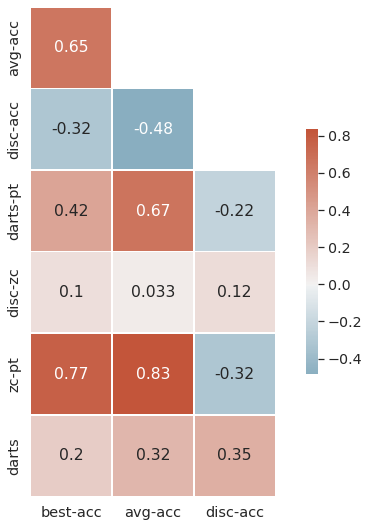

In [10]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import pathlib

sns.set_theme(style="white")
plt.figure(figsize=(8,5))
#if 'zc' in flat_op_strengths:
#    flat_op_strengths.pop('zc')
df = df_mean
df=df.reindex(["best-acc", "avg-acc", "disc-acc", "darts-pt", "disc-zc", "zc-pt", "darts"])
df = df[["best-acc", "avg-acc", "disc-acc", "darts-pt", "disc-zc", "zc-pt", "darts"]]
#print(df)

# Compute the correlation matrix
#corr = df.corr(method='spearman')
corr = df
print(corr)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

for i in range(3,7):
    for j in range(0,7):
        mask[j][i]=True

masked_corr = df.loc[~np.all(mask, axis=1), ~np.all(mask, axis=0)]
masked_mask = mask[1:7,0:3]
print(np.shape(masked_corr))
print(np.shape(masked_mask))


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
sns.set(font_scale=1.3)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(masked_corr, mask=masked_mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

g.set_yticklabels(labels=g.get_yticklabels(), va='center', fontsize = 14.5)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 14.5)

f.savefig(pathlib.Path('metric_correlation_vert').with_suffix('.pdf'), bbox_inches='tight')

In [35]:
plot_data = []
metrics = op_strengths[0].keys()
best_archs = {}
for m in metrics:
    best_archs[m] = []
    plot_data.append([m,{}])
for j,edge in enumerate(op_strengths):
    bop = -1
    bm = -1
    for i,m in enumerate(metrics):
        if 'pt' in m:
            bm = min(edge[m])
        else:
            bm = max(edge[m])
        bop = edge[m].index(bm)
        #print(m,ops[bop],bm)
        best_archs[m].append(bop)
        
i=0
for k,v in best_archs.items():

    acc = stat.mean(acc_d[tuple(v)])
    
    for j,bop in enumerate(v):
        plot_data[i][1][j]=ops[bop]
    plot_data[i][1]['acc']=acc
        
    i+=1
    print(k,v,acc)
print(ops)

NameError: name 'acc_d' is not defined

In [477]:
plot_data

[['avg-acc',
  {0: 'nor_conv_3x3',
   1: 'nor_conv_3x3',
   2: 'nor_conv_3x3',
   3: 'nor_conv_3x3',
   4: 'nor_conv_3x3',
   5: 'nor_conv_3x3',
   'acc': 93.76}],
 ['disc-acc',
  {0: 'none',
   1: 'none',
   2: 'none',
   3: 'skip_connect',
   4: 'none',
   5: 'none',
   'acc': 86.45333333333333}],
 ['darts-pt',
  {0: 'skip_connect',
   1: 'skip_connect',
   2: 'nor_conv_3x3',
   3: 'skip_connect',
   4: 'skip_connect',
   5: 'skip_connect',
   'acc': 80.57}],
 ['zc-pt',
  {0: 'nor_conv_3x3',
   1: 'nor_conv_3x3',
   2: 'nor_conv_1x1',
   3: 'skip_connect',
   4: 'nor_conv_3x3',
   5: 'nor_conv_1x1',
   'acc': 94.195}],
 ['disc-zc',
  {0: 'skip_connect',
   1: 'skip_connect',
   2: 'nor_conv_1x1',
   3: 'skip_connect',
   4: 'skip_connect',
   5: 'skip_connect',
   'acc': 77.04333333333334}],
 ['best-acc',
  {0: 'nor_conv_3x3',
   1: 'nor_conv_3x3',
   2: 'nor_conv_3x3',
   3: 'skip_connect',
   4: 'nor_conv_3x3',
   5: 'nor_conv_1x1',
   'acc': 94.37333333333333}],
 ['darts',
  {0: '

In [478]:
import hiplot as hip
dps = []
for uid,data in plot_data:
    dp = hip.Datapoint(uid=uid, values=data)
    dps.append(dp)
hip.Experiment(datapoints=dps).display(force_full_width=False)


<IPython.core.display.Javascript object>

In [479]:
acc_d = pickle.load(open('nb2_test_acc_cf10.p','rb'))
for m in metrics:
    best_ops = best_archs[m]
    selected_acc = stat.mean(acc_d[tuple(best_ops)]) # avg accuracy
    rank = 1
    for k,v in acc_d.items():
        if stat.mean(v) > selected_acc:
            rank += 1
    print(m,'rank = ',rank,'/',len(acc_d), 'top', round(rank/len(acc_d)*100,1), '% error=', round(100-selected_acc,2))

avg-acc rank =  166 / 15625 top 1.1 % error= 6.24
disc-acc rank =  12744 / 15625 top 81.6 % error= 13.55
darts-pt rank =  13770 / 15625 top 88.1 % error= 19.43
zc-pt rank =  14 / 15625 top 0.1 % error= 5.81
disc-zc rank =  14274 / 15625 top 91.4 % error= 22.96
best-acc rank =  1 / 15625 top 0.0 % error= 5.63
darts rank =  15231 / 15625 top 97.5 % error= 45.7


In [482]:
acc_d = pickle.load(open('nb2_test_acc_cf10.p','rb'))
for m in metrics:
    best_ops = best_archs[m]
    selected_acc = max(acc_d[tuple(best_ops)]) # best acc
    rank = 1
    for k,v in acc_d.items():
        if max(v) > selected_acc:
            rank += 1
    print(m,'rank = ',rank,'/',len(acc_d), 'top', round(rank/len(acc_d)*100,1), '% error=', round(100-selected_acc,2))

avg-acc rank =  92 / 15625 top 0.6 % error= 6.02
disc-acc rank =  12803 / 15625 top 81.9 % error= 13.43
darts-pt rank =  13754 / 15625 top 88.0 % error= 18.75
zc-pt rank =  16 / 15625 top 0.1 % error= 5.72
disc-zc rank =  14273 / 15625 top 91.3 % error= 22.39
best-acc rank =  1 / 15625 top 0.0 % error= 5.32
darts rank =  15141 / 15625 top 96.9 % error= 37.45


In [483]:
def get_top(k):
    return f"""\\begin{{table}}[t]
\\centering
\\caption {{Raw values of operation scoring functions to reproduce Figure~\\ref{{metric_correlation}}.}}
\\footnotesize 
\\begin{{threeparttable}} 
\\begin{{tabular}}{{@{{}}lcccccc@{{}}}} 
\\toprule
& $edge\\backslash op$ & none & skip\_connect & nor\_conv\_1x1 & nor\_conv\_3x3 & avg\_pool\_3x3  \\\\ \\toprule"""

def get_bot(k):
    return f"""\\bottomrule
\\end{{tabular}}
\\end{{threeparttable}}
\\label{{tbl:raw-{k}}}
\\end{{table}}"""

In [487]:
import copy
print(get_top(k))
for k,v in sq_op_strengths.items():
    #print(k)
    for i,r in enumerate(v):
        if i == 0:
            print(f'\\parbox[t]{{2mm}}{{\\multirow{{6}}{{*}}{{\\rotatebox[origin=c]{{90}}{{{k}}}}}}} & ', end='')
            print(f'{i} & ', end='')
        else:
            print(f' & {i} & ', end='')
        for c in r:
            first  = max(r)
            rr = copy.copy(r)
            rr.sort()
            second = rr[-2]
            if c == first:
                print(f'\\best{{{round(c,2)}}}', end='')
            elif c == second:
                print(f'\\secondbest{{{round(c,2)}}}', end='')
            else:
                print(round(c,2), end='')
            if c != r[-1]:
                print(' & ', end='')
            else:
                print(' \\\\')
    print('\\midrule')
print(get_bot('op-scores'))
print()

\begin{table}[t]
\centering
\caption {Raw values of operation scoring functions to reproduce Figure~\ref{metric_correlation}.}
\footnotesize 
\begin{threeparttable} 
\begin{tabular}{@{}lcccccc@{}} 
\toprule
& $edge\backslash op$ & none & skip\_connect & nor\_conv\_1x1 & nor\_conv\_3x3 & avg\_pool\_3x3  \\ \toprule
\parbox[t]{2mm}{\multirow{6}{*}{\rotatebox[origin=c]{90}{avg-acc}}} & 0 & 77.36 & 81.02 & 83.81 & \secondbest{86.38} & \best{87.32} \\
 & 1 & 80.03 & 83.11 & \secondbest{85.23} & \best{85.99} & 81.52 \\
 & 2 & 82.9 & 82.44 & \secondbest{84.05} & \best{84.49} & 81.98 \\
 & 3 & 74.02 & 85.17 & \secondbest{87.3} & \best{88.28} & 81.38 \\
 & 4 & 80.14 & 83.05 & \secondbest{85.09} & \best{85.7} & 81.89 \\
 & 5 & 77.61 & 83.43 & \secondbest{86.18} & \best{86.95} & 81.74 \\
\midrule
\parbox[t]{2mm}{\multirow{6}{*}{\rotatebox[origin=c]{90}{disc-acc}}} & 0 & \best{83.27} & \secondbest{82.24} & 65.0 & 71.76 & 54.31 \\
 & 1 & \best{84.94} & 83.23 & 73.23 & 76.77 & \secondbest{83.45} \\


In [22]:
from itertools import product
x =list(product([0,1,2,3], repeat=4))

In [23]:
print(x)

[(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 0, 2), (0, 0, 0, 3), (0, 0, 1, 0), (0, 0, 1, 1), (0, 0, 1, 2), (0, 0, 1, 3), (0, 0, 2, 0), (0, 0, 2, 1), (0, 0, 2, 2), (0, 0, 2, 3), (0, 0, 3, 0), (0, 0, 3, 1), (0, 0, 3, 2), (0, 0, 3, 3), (0, 1, 0, 0), (0, 1, 0, 1), (0, 1, 0, 2), (0, 1, 0, 3), (0, 1, 1, 0), (0, 1, 1, 1), (0, 1, 1, 2), (0, 1, 1, 3), (0, 1, 2, 0), (0, 1, 2, 1), (0, 1, 2, 2), (0, 1, 2, 3), (0, 1, 3, 0), (0, 1, 3, 1), (0, 1, 3, 2), (0, 1, 3, 3), (0, 2, 0, 0), (0, 2, 0, 1), (0, 2, 0, 2), (0, 2, 0, 3), (0, 2, 1, 0), (0, 2, 1, 1), (0, 2, 1, 2), (0, 2, 1, 3), (0, 2, 2, 0), (0, 2, 2, 1), (0, 2, 2, 2), (0, 2, 2, 3), (0, 2, 3, 0), (0, 2, 3, 1), (0, 2, 3, 2), (0, 2, 3, 3), (0, 3, 0, 0), (0, 3, 0, 1), (0, 3, 0, 2), (0, 3, 0, 3), (0, 3, 1, 0), (0, 3, 1, 1), (0, 3, 1, 2), (0, 3, 1, 3), (0, 3, 2, 0), (0, 3, 2, 1), (0, 3, 2, 2), (0, 3, 2, 3), (0, 3, 3, 0), (0, 3, 3, 1), (0, 3, 3, 2), (0, 3, 3, 3), (1, 0, 0, 0), (1, 0, 0, 1), (1, 0, 0, 2), (1, 0, 0, 3), (1, 0, 1, 0), (1, 0, 1, 1), (1, 0, 1, 2), (1, 0